In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import re

In [2]:
fake = pd.read_csv('fake_news.csv')
true = pd.read_csv('real_news.csv')
fake["label"] = 0
true["label"] = 1
data = pd.concat([fake,true], axis =0 )
data.head()

,label,id,date,user_id,text,pic_url,video_url,comment_num,repost_num,like_num,analysis
0,0,460b078edd44280dc2535535add5d2fa,2020-02-06 10:48,8b1bc48b06fb7ad014182cc91be44156,这是发生在重症隔离病房里，一个小朋友对医生说的话我不想让妈妈哭😭 不是晚一点，是你不会si的...,[],http://f.video.weibocdn.com/000lGgVrlx07AJGBul...,4,2,30,经查，该视频所称“武汉重症隔离病房里，一个小朋友对医生说的话”，实为电影《倾城之泪》中的片段...
1,0,2ea0c40dbb900959069a62609f10909c,2020-07-03 10:51,40e2e17e668a3e6b01506f7fedd64bd6,#北京健康宝崩了#，没了健康宝，什么也做不了，#北京# 上班也迟到了，希望能尽快修好，加油健...,[],http://f.video.weibocdn.com/003exorvgx07ExKn4n...,0,0,0,经查，该微博发视频称“健康宝崩了进不了地铁”不实，北京地铁官方回应：北京地铁目前没有采取进站...
2,0,d7814922985f7b337347ffc0ff0eae56,2020-02-22 23:00,b75f00f6210a0e7543f623fbee435f37,【疫情当前，大意不得：全国已有12起复工后聚集性疫情发生】近期全国陆续复工，据不完全统计，复...,[],NaN,3,2,4,经查，该微博称“内蒙古赤峰一发电厂复工后发生的聚集性疫情”不实，@赤峰市公安局官方微博 已辟...
3,0,e7ba5f3eab27e4d11acf903e1f7229c9,2020-02-19 11:24,ab592925d8db644da43c77b9ce5f8885,学校开学时间：高三，初三，3月2日开学，高一，高二，初一，初二，3月9日开学，小学4一6年级...,[],NaN,0,0,0,经查，该微博称“3月16日居民出行正常化”不实，@中国互联网联合辟谣平台 已辟谣：类似信息已...
4,0,91bf7a5e1bd92f46aecefb4668799be4,2020-03-19 21:10,7f19dfabb4ab6874dba723a22be6c0c5,美国的10艘医疗军舰已经开进纽约港，每艘船上有1000张病床，上面拥有所有的医疗抢救设施，每...,[],NaN,16,2,9,经查，该微博称“美国的10艘医疗军舰已经开进纽约港”不实，@捉谣记 已辟谣：美国总统特朗普3...


In [3]:
data.shape

(2104, 11)

In [4]:
data.columns

Index(['label', 'id', 'date', 'user_id', 'text', 'pic_url', 'video_url',
       'comment_num', 'repost_num', 'like_num', 'analysis'],
      dtype='object')

In [5]:
data.isnull().sum() # checking null values

label             0
id                0
date              0
user_id           0
text              0
pic_url           0
video_url      1435
comment_num       0
repost_num        0
like_num          0
analysis       1761
dtype: int64

# DATA PREPROCESSING

In [6]:
df = data.copy()

In [7]:
df['News'] = df['text']+df['analysis']

In [8]:
df.tail()

,label,id,date,user_id,text,pic_url,video_url,comment_num,repost_num,like_num,analysis,News
1755,1,6a62afd4dc6de5d599975be1cef6a3f3,2020-02-29 16:01,43a971db6364c4ed7cd101feca243600,【人民直播：#湖北疫情防控工作发布会#】2月29日下午四点，湖北省新型冠状病毒肺炎疫情防控工...,[],http://f.video.weibocdn.com/h0ri4Cgvlx07Buicyt...,2091,263,21436,NaN,NaN
1756,1,cb3b1576b7229f233d1abca276db6934,2020-07-06 16:10,43a971db6364c4ed7cd101feca243600,【牛津大学最新研究：#新冠病毒在亚洲出现前已在其他地方出现#】据《每日电讯报》，牛津大学循证...,['https://wx4.sinaimg.cn/orj360/a716fd45ly1ggh...,NaN,6067,8209,311841,NaN,NaN
1757,1,83c7e8e9373dc4282274ad8b65ae9e3b,2020-04-18 07:47,43a971db6364c4ed7cd101feca243600,【#世卫组织肯定中国订正新冠病例数据#】世界卫生组织卫生紧急项目技术负责人范凯尔克霍弗周五表...,[],http://miaopai.video.weibocdn.com/BdBn0Zyklx07...,2009,1784,41240,NaN,NaN
1758,1,ed1e051bd90472ffafa6bc29a021c4e4,2020-03-27 14:46,43a971db6364c4ed7cd101feca243600,【#疫情防控期被没收的幺鸡回家了#】25日，四川成都天府新区公安分局兴隆派出所民警将“代养”...,[],http://miaopai.video.weibocdn.com/UDIQS4eslx07...,659,539,5327,NaN,NaN
1759,1,a07e12c7863ceb9bb9336b28286ef183,2020-02-08 23:26,43a971db6364c4ed7cd101feca243600,【#多地地标元宵节亮灯为武汉加油#】2月8日，农历正月十五，元宵佳节。深圳、杭州、西安、成都...,[],http://f.video.weibocdn.com/003K3YDjlx07ANIqmK...,1841,2186,16558,NaN,NaN


In [9]:
df.isnull().sum()

label             0
id                0
date              0
user_id           0
text              0
pic_url           0
video_url      1435
comment_num       0
repost_num        0
like_num          0
analysis       1761
News           1761
dtype: int64

In [10]:
df['News'] = df['News'].fillna('')

In [11]:
df.columns

Index(['label', 'id', 'date', 'user_id', 'text', 'pic_url', 'video_url',
       'comment_num', 'repost_num', 'like_num', 'analysis', 'News'],
      dtype='object')

In [12]:
features_dropped = ['id','date','user_id','text','pic_url','video_url','comment_num','repost_num','like_num','analysis',]
df = df.drop(features_dropped, axis =1)

In [13]:
df.columns

Index(['label', 'News'], dtype='object')

In [14]:
df.head()

,label,News
0,0,这是发生在重症隔离病房里，一个小朋友对医生说的话我不想让妈妈哭😭 不是晚一点，是你不会si的...
1,0,#北京健康宝崩了#，没了健康宝，什么也做不了，#北京# 上班也迟到了，希望能尽快修好，加油健...
2,0,【疫情当前，大意不得：全国已有12起复工后聚集性疫情发生】近期全国陆续复工，据不完全统计，复...
3,0,学校开学时间：高三，初三，3月2日开学，高一，高二，初一，初二，3月9日开学，小学4一6年级...
4,0,美国的10艘医疗军舰已经开进纽约港，每艘船上有1000张病床，上面拥有所有的医疗抢救设施，每...


# Text Processing

In [15]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [16]:
df['News'] = df['News'].apply(wordopt)

In [17]:
df.head()

,label,News
0,0,这是发生在重症隔离病房里 一个小朋友对医生说的话我不想让妈妈哭 不是晚一点 是你不会si的...
1,0,北京健康宝崩了 没了健康宝 什么也做不了 北京 上班也迟到了 希望能尽快修好 加油健...
2,0,疫情当前 大意不得 近期全国陆续复工 据不完全统计 包含内蒙古赤峰一发电厂 山西...
3,0,学校开学时间 高三 初三 高一 高二 初一 初二 幼儿园 大学 职校继续延时 直至...
4,0,上面拥有所有的医疗抢救设施 每艘船相当于一个雷神山医院 而且美国还有很强的建立field...


In [18]:
X = df['News']
Y = df['label']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.85, random_state= 12)

In [58]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Random Forest

In [48]:
plot1=[]

In [49]:
RFC_model = RandomForestClassifier(random_state=0)

#Fitting training set to the model
RFC_model.fit(xv_train, y_train)

#Predicting the test set results based on the model
rfc_y_pred = RFC_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,rfc_y_pred)
plot1.append(score)
print('Accuracy of RFC model is ', score)

Accuracy of RFC model is  0.9994410285075461


# LogisticRegression

In [50]:
LR_model = LogisticRegression()

#Fitting training set to the model
LR_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
lr_y_pred = LR_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,lr_y_pred)
plot1.append(score)
print('Accuracy of LR model is ', score)

Accuracy of LR model is  0.9983230855226384


# Decision Tree

In [51]:
DT_model = DecisionTreeClassifier()

#Fitting training set to the model
DT_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
dt_y_pred = DT_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,dt_y_pred)
plot1.append(score)
print('Accuracy of DT model is ', score)

Accuracy of DT model is  0.9994410285075461


# KNN CLASSIFIER

In [59]:
KNN_model =KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

#Fitting training set to the model
KNN_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
knn_y_pred = KNN_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,knn_y_pred)
plot1.append(score)
print('Accuracy of KNN model is ', score)

Accuracy of KNN model is  0.9815539407490218


# Linear SVM

In [53]:
svm_model = SVC(kernel='linear')

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)
plot1.append(score)
print('Accuracy of SVM model is ', score)

Accuracy of SVM model is  0.9994410285075461


# Gradient Boosting

In [40]:
GB_model =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(xv_train,y_train)

#Fitting training set to the model
GB_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
gb_y_pred = GB_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,gb_y_pred)
plot1.append(score)
print('Accuracy of GB model is ', score)

Accuracy of GB model is  0.9994410285075461


# Manual Testing

In [41]:
def fake_news_det(news):
    input_data = {"text":[news]}
    new_def_test = pd.DataFrame(input_data)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    #print(new_x_test)
    vectorized_input_data = vectorization.transform(new_x_test)
    prediction = DT_model.predict(vectorized_input_data)
    if prediction == 1:
        print("Not a Fake News")
    else:
        print("Fake News")

In [42]:
fake_news_det("这是发生在重症隔离病房里，一个小朋友对医生说的话我不想让妈妈哭") 

Not a Fake News


# Plotting

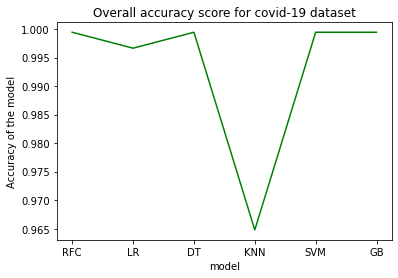

In [43]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(["RFC","LR","DT","KNN","SVM","GB"])
y = plot1

# plotting
plt.title("Overall accuracy score for covid-19 dataset")
plt.xlabel("model")
plt.ylabel("Accuracy of the model")
plt.plot(x, y, color ="green")
plt.show()

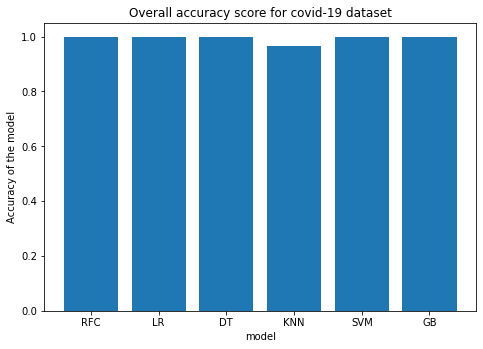

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.array(["RFC","LR","DT","KNN","SVM","GB"])
y = plot1
ax.bar(x,y)
plt.title("Overall accuracy score for covid-19 dataset")
plt.xlabel("model")
plt.ylabel("Accuracy of the model")
plt.show()